In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Tomato/Train'
valid_path = '/content/gdrive/MyDrive/Tomato/Train'

In [5]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [6]:
for layer in inception.layers:
    layer.trainable = False

In [7]:
folders = glob('/content/gdrive/MyDrive/Tomato/Train/*')

In [8]:
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Tomato/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5194 images belonging to 10 classes.


In [14]:
print(training_set.class_indices) #prints every single key and class of that dataset
labels = '\n'.join(sorted(training_set.class_indices.keys())) #print all these keys as a list of labels into a text file called labels.txt
with open('labels.txt', 'w') as f: #writes to the labels.txt file, and if it doesnt exists, it creates one, and if it does exist, it will overrite it. (thats what 'w' is for)
    f.write(labels)

{'Bacterial_spot': 0, 'Early_blight': 1, 'Healthy': 2, 'Late_blight': 3, 'Leaf_Mold': 4, 'Septoria_leaf_spot': 5, 'Spider_mites Two-spotted_spider_mite': 6, 'Target_Spot': 7, 'Yellow_Leaf_Curl_Virus': 8, 'mosaic_virus': 9}


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Tomato/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1132 images belonging to 10 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
163/163 [==============================] - 1531s 9s/step - loss: 4.7727 - accuracy: 0.5273 - val_loss: 4.2401 - val_accuracy: 0.5451
Epoch 2/20
163/163 [==============================] - 93s 568ms/step - loss: 2.6847 - accuracy: 0.6677 - val_loss: 5.6126 - val_accuracy: 0.6572
Epoch 3/20
163/163 [==============================] - 92s 567ms/step - loss: 2.5478 - accuracy: 0.6883 - val_loss: 5.4040 - val_accuracy: 0.5592
Epoch 4/20
163/163 [==============================] - 92s 566ms/step - loss: 2.7485 - accuracy: 0.7216 - val_loss: 6.9460 - val_accuracy: 0.6466
Epoch 5/20
163/163 [==============================] - 95s 583ms/step - loss: 2.7432 - accuracy: 0.7339 - val_loss: 6.5526 - val_accuracy: 0.5733
Epoch 6/20
163/163 [==============================] - 92s 563ms/step - loss: 2.2354 - accuracy: 0.7678 - val_loss: 6.8072 - val_accuracy: 0.6131
Epoch 7/20
163/163 [==============================] - 92s 564ms/step - loss: 2.5761 - accuracy: 0.7461 - val_loss: 6.8906 - val_acc

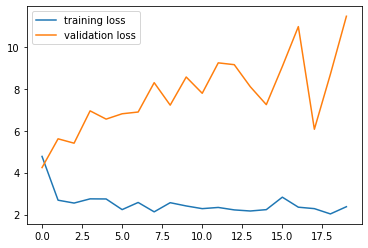

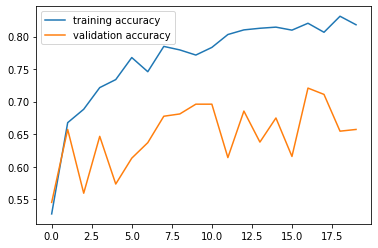

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossValidation_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='training accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccuracyValidation_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('tomato_model.h5')
model.save_weights('Tomato_weights.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.0000000e+00, 1.0000000e+00, 4.4443304e-25, ..., 1.9306918e-31,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 6.7945162e-28, 1.9751607e-28, ..., 4.4258160e-20,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [2.7542691e-32, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5553988e-27, 1.0000000e+00, 0.0000000e+00, ..., 1.5437425e-19,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.8339386e-35,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 9, 9, ..., 1, 1, 8])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('tomato_model.h5')
model.load_weights('Tomato_weights.h5')

In [ ]:
img=image.load_img('/content/gdrive/MyDrive/Tomato/Test/Bacterial_spot/image (2001).JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[126., 112., 109.],
        [131., 117., 114.],
        [118., 104., 101.],
        ...,
        [166., 155., 151.],
        [168., 157., 153.],
        [171., 160., 156.]],

       [[126., 112., 109.],
        [133., 119., 116.],
        [125., 111., 108.],
        ...,
        [167., 156., 152.],
        [166., 155., 151.],
        [165., 154., 150.]],

       [[127., 113., 110.],
        [132., 118., 115.],
        [127., 113., 110.],
        ...,
        [172., 161., 157.],
        [169., 158., 154.],
        [165., 154., 150.]],

       ...,

       [[150., 140., 141.],
        [145., 135., 136.],
        [141., 131., 132.],
        ...,
        [162., 156., 156.],
        [161., 155., 155.],
        [160., 154., 154.]],

       [[155., 145., 146.],
        [155., 145., 146.],
        [153., 143., 144.],
        ...,
        [163., 157., 157.],
        [161., 155., 155.],
        [160., 154., 154.]],

       [[134., 124., 125.],
        [143., 133., 134.],
        [151., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1.2764645e-12, 9.9998248e-01, 1.7869904e-09, 7.1907889e-11,
        3.6547054e-13, 9.0293888e-06, 1.8338081e-07, 1.7789212e-12,
        1.2544127e-14, 8.3452142e-06]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([1])

In [ ]:
a==1

array([ True])